In [55]:
import pandas as pd
import  numpy as  np
import matplotlib.pyplot  as  plt
import seaborn  as  sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster  import KMeans

In [2]:
df = pd.read_csv(r'C:\Users\Administrator\Downloads\knn-mall-customer dataset\Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()
print("\n\n\n NO missing values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB



 NO missing values


In [5]:
df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True)


In [6]:
#data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    bool 
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: bool(1), int64(4)
memory usage: 6.6 KB


## **Insights from the Data**

In [9]:
#1.  There is no strong coorelation between any columns ( using heatmap and pairplot).

#2. As age of both gender increases their spending habit decreases.
             
#3. female      mean Age 38.098214   mean Annual Income (k$)59.250000     mean Spending Score 51.526786
#4. male        mean Age 39.806818   mean Annual Income (k$)62.227273     mean Spending Score 48.511364

#5. max income of female is 126k and min is 16k
#6. max income of male is 137k and min is 15k 

#7. highest spending score is of a female (99 out of 100)

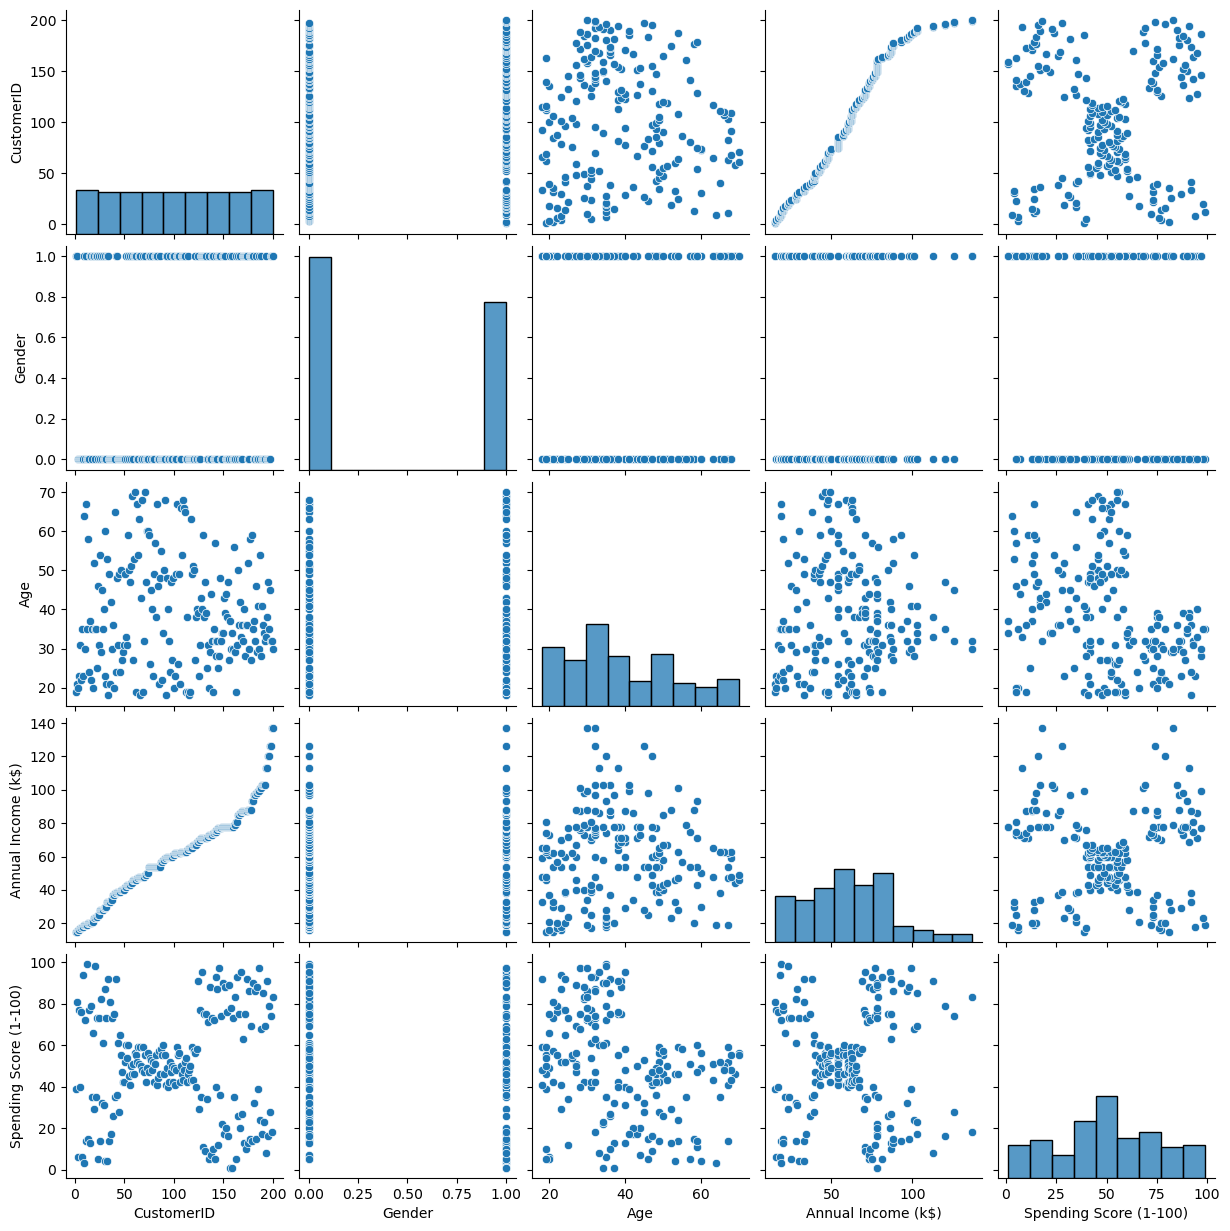

In [10]:
#lets see the plots between different columns of the dataset
sns.pairplot(df)

<Axes: >

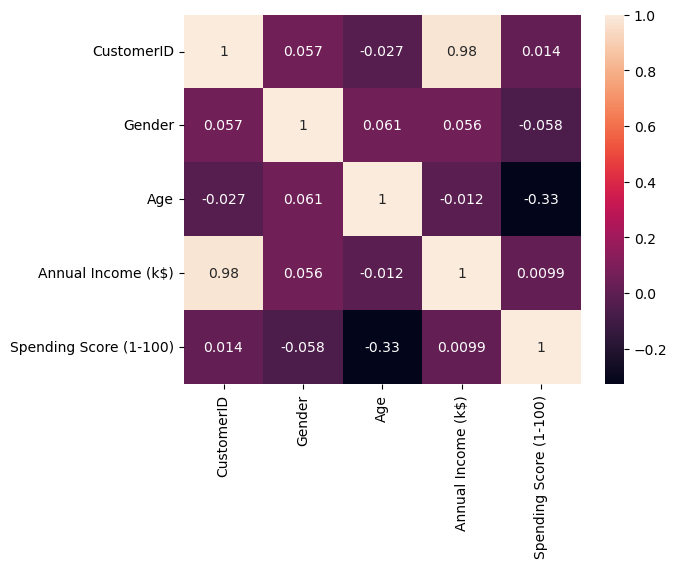

In [11]:
sns.heatmap(df.corr(),annot=True)

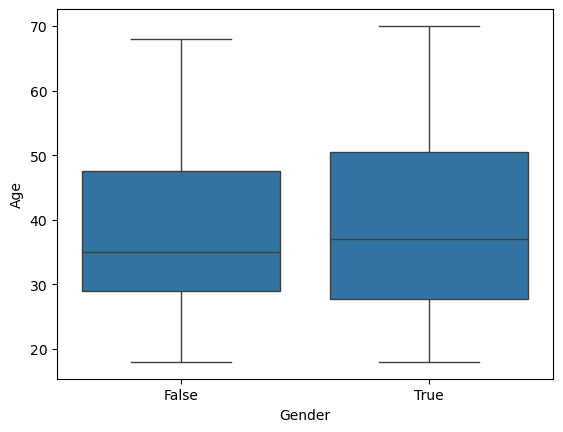

In [12]:

#outliers  0 = Female , 1= Male
sns.boxplot(x='Gender',y='Age',data=df);

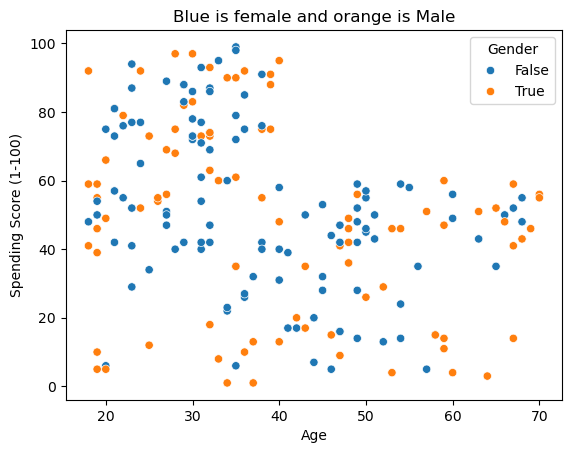

In [13]:
sns.scatterplot(data=df,x='Age',y='Spending Score (1-100)',hue='Gender')
plt.title("Blue is female and orange is Male")
plt.show()

In [14]:
Gen =df.groupby('Gender')


In [15]:
print("\t\t\t0 is female and 1 is male")
Gen.mean()

			0 is female and 1 is male


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
False,97.562500,38.098214,59.250000,51.526786
True,104.238636,39.806818,62.227273,48.511364


In [16]:
#max and min 
print(Gen.max())
print('\n\n')
print(Gen.min())

        CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                             
False          197   68                 126                      99
True           200   70                 137                      97



        CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                             
False            3   18                  16                       5
True             1   18                  15                       1


# KNN Algorithm

In [57]:
X= df.iloc[:, [3,4]].values

In [71]:
#km = KMeans(n_clusters=5)


In [72]:
wcss=[]

In [73]:
for i in range(1,11): #Using range function to find the elbow
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0) 
  kmeans.fit(X)
  wcss.append(kmeans.inertia_) 

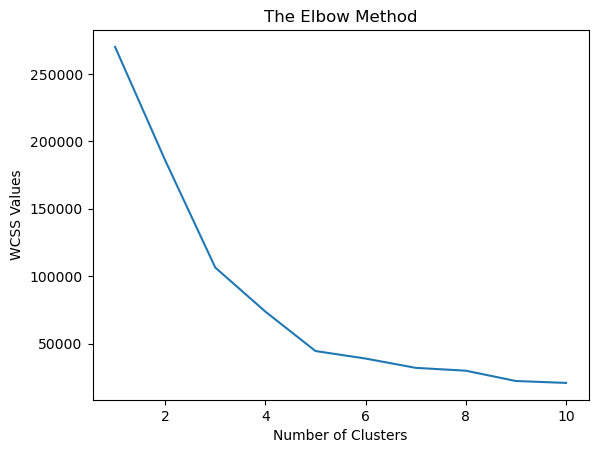

In [74]:

plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS Values")
plt.show()

In [75]:
kmeansmodel=KMeans(n_clusters=5,init='k-means++',random_state=0)

In [76]:

y_kmeans = kmeansmodel.fit_predict(X)
     

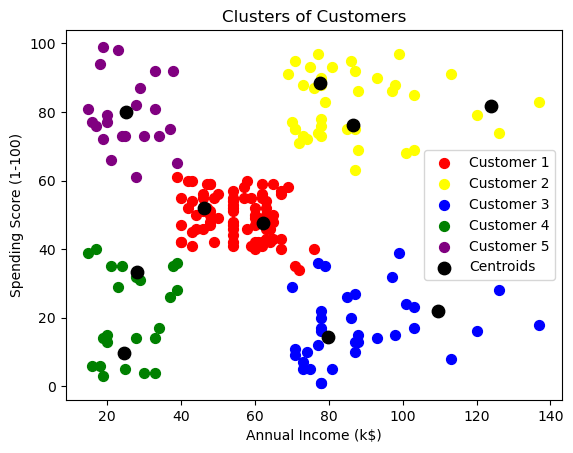

In [77]:

plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1],s=50,c='red',label="Customer 1") 
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1],s=50,c='yellow',label="Customer 2")
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1],s=50,c='blue',label="Customer 3")
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1],s=50,c='green',label="Customer 4")
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1],s=50,c='purple',label="Customer 5")

#Plotting Centroids to make it more informative
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=80,c='black',label='Centroids')
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()